# 캐글 타이타닉 생존자 예측
https://www.kaggle.com/competitions/titanic/overview

## 캐글 진행 단계
1. 문제 정의
2. 학습, 테스트 데이터 획득
3. 데이터 전처리
4. 데이터 분석
5. 문제 모델링, 문제 예측 및 해결
6. 시각화 및 문제 해결 단계외 최종 해결책을 제시
7. 결과제출

### 대회 목적
승객 정보를 보고 생사에 영향을 주는 속성이 무엇이며, 어떤 경향을 보이는지 파악한 후 생사 여부를 알 수 없는 승객이 과연 생존했는지 사망했는지를 예측

필요한 라이브러리 선언

In [1]:
import pandas as pd
import numpy as np

### 학습, 테스트 데이터 획득

데이터 처리가 쉬운 pandas 패키지를 사용

In [2]:
#판다스에서 가져온 데이터 = 데이터프레임:행과 열 있는 테이블 형식
train_df=pd.read_csv("C:/kaggle/titanic/data/train.csv")
test_df=pd.read_csv("C:/kaggle/titanic/data/test.csv")
submission=pd.read_csv("C:/kaggle/titanic/data/gender_submission.csv")

In [3]:
#데이터 잘 불렀는지 확인
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### 랜덤시드 설정

In [6]:
import random
np.random.seed(1234)
random.seed(1234)

### 데이터 개요 파악
#### 데이터 행과 열 확인하기

In [7]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


#### 데이터 내용 미리보기

In [8]:
#표시할 수 있는 행과 열 정해져있음
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#자유롭게 행과 열 표시
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)

#### 데이터 피처 확인

In [10]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


어떤 특성이 survived와 연관이 있을지 생각해보기

#### 데이터 속성 확인

In [11]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

질적 변수: 분류를 위한 수치, 수차 사이의 간격에 큰 의미가 없는 경우 ex) Pclass
 - 명목 척도: 단지 분류를 위한 것 ex) 방 번호, 티켓 번호 
 - 순서 척도: 질적 변수중 순서에 의미가 있는 것 ex) Pclass
 
양적 변수: 간격에 의미가 있는 수치 ex) age, fare
 - 간격 척도: 같은 간격의 눈금으로 측정 하는 것
 - 비례 척도:  간격 척도의 조건을 만족시키는것 중 원점이 있어서 데이터 비율에 의미를 갖는 것 ex) fare : 3달러 티켓 1달러 티켓보다 3배 비싸다

#### 데이터의 통계량 확인하기

In [12]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 카테고리 변수 확인하기

In [13]:
#특정 열 데이터 확인
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
#Embarked의 카테고리 별로 개수 파악
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
#방 번호
train_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

#### 결측치 확인

In [16]:
#행과 열별로 결측치 존재 여부 파악
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
#각 변수별 결측치
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

age 및 cabin의 속성에 결측치 많음을 확인

### 데이터 시각화

#### 시각화용 라이브러리 설치

In [19]:
#주피터 노트북 안에서 그래프 표시
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#### 표시 스타일 지정

In [20]:
#다양한 스타이 있음, 여기서는 대중적 ggplot 사용
plt.style.use('ggplot')

#### 데이터 프레임에서 임의의 열 추출하기
survived의 값별로 각 값에 차이가 있는지 확인하기 위해 Embarked,Survived,PassengerId 추출

In [21]:
train_df[['Embarked','Survived','PassengerId']]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


#### 시각화하고 싶은 데이터에서 결측치 제외

In [22]:
train_df[['Embarked','Survived','PassengerId']].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


#### Embarked와 Survived로만 집계
groupby안에 작성한 후 count로 실행

In [23]:
train_df[['Embarked','Survived','PassengerId']].dropna().groupby(['Embarked','Survived']).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

#### 데이터를 수평으로 변환
데이터프레임을 시각화하기 쉽게 바꾸기

In [24]:
#unstack으로 수직 -> 수평 변환
embarked_df=train_df[['Embarked','Survived','PassengerId']].dropna().groupby(['Embarked','Survived']).count().unstack()

embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

#### 누적 막대 그래프로 시각화

<AxesSubplot:xlabel='Embarked'>

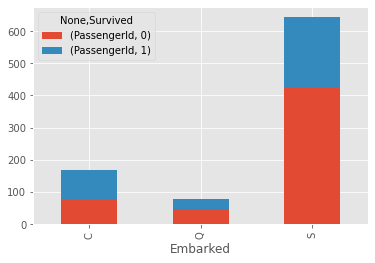

In [25]:
embarked_df.plot.bar(stacked=True)

c에서 절반 정도 사망, q,s에서는 절반 이상 사망<br>
=>승선항구에 따라 승객 유형이나 상태에 차이가 있을수도 있다

In [26]:
#0번째 열(사망 수)을 0번째 열과 1번째 열(생존 수)의 합으로 나누기
embarked_df['survived_rate']=embarked_df.iloc[:,0]/(embarked_df.iloc[:,0]+embarked_df.iloc[:,1])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

#### 성별과 티켓 등급 시각화

<AxesSubplot:xlabel='Sex'>

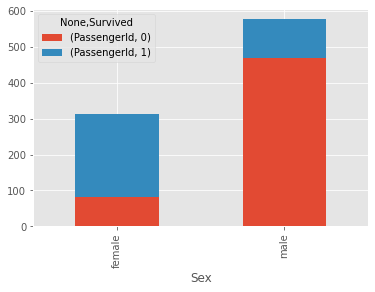

In [27]:
sex_df=train_df[['Sex','Survived','PassengerId']].dropna().groupby(['Sex','Survived']).count().unstack()

sex_df.plot.bar(stacked=True)

<AxesSubplot:xlabel='Pclass'>

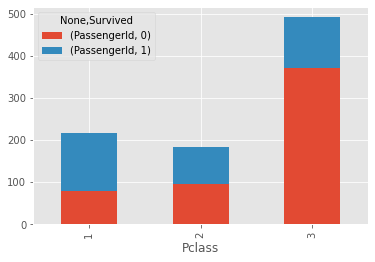

In [28]:
ticket_df=train_df[['Pclass','Survived','PassengerId']].dropna().groupby(['Pclass','Survived']).count().unstack()

ticket_df.plot.bar(stacked=True)

여성> 남성, 티켓 등급이 높을수록 생존율 높다

#### 연령별 생존율을 히스토그램으로 시각화
연령은 연속 값이므로 히스트로그램으로 확인<br>
plt.hist() // 히스트로그램 그리기<br>
histtype='barstacked' // 여러 히스토그램 동시에 보이기<br>
bins=8 // 히스트로그램 빈 개수<br>
label // 라벨 지정<br>
plt.legend() // 라벨 표시<br>

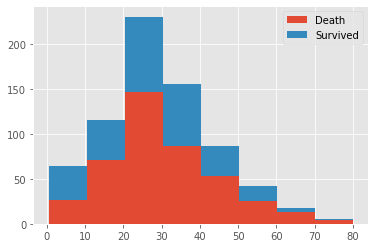

In [29]:
plt.hist(x=[train_df.Age[train_df.Survived==0], train_df.Age[train_df.Survived==1]],bins=8,histtype='barstacked',label=['Death','Survived'])
plt.legend()

#### 10세 이하가 다른 연령에 비해 생존율 높다

#### 카테고리 변수를 더미 변수화하기
문자열 변수 분석이나 머신 러닝에서 사용 불가능<br>
수치 데이터가 아니라면 수치로 변환<br>
원-핫 인코딩: 어떤 카테고리에 대하여 1,0으로 표현<br>
=>더미 변수화 한다

In [30]:
#drop_first=True 하면 중복 열 제외
train_df_corr=pd.get_dummies(train_df,columns=['Sex'],drop_first=True)
train_df_corr=pd.get_dummies(train_df_corr,columns=['Embarked'])

train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


#### 상관 행렬 작성
-1~1의 수치로 확인

In [31]:
train_corr=train_df_corr.corr()

train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


#### 히트맵으로 시각화
annot // 상관 계수가 각 칸에 숫자로 나타남

<AxesSubplot:>

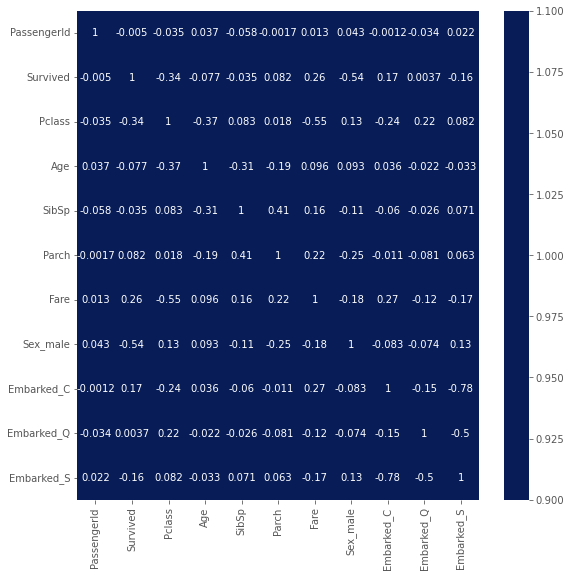

In [32]:
plt.figure(figsize=(9,9))
sns.heatmap(train_corr,vmax=1,vmin=1,center=0,annot=True,cmap='YlGnBu')

### 데이터 전처리
#### 데이터 통합
전체 집계나 통계 정보 보기 쉬움

In [33]:
#결합 후 행 순서 바뀌지 않음, 원래 행 번호 삭제
all_df=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)

all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### 전체 데이터 결측치 확인

In [34]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

#### 결측치 메우기

In [35]:
#pclass별 fare 평균값 구하기
Fare_mean=all_df[['Pclass','Fare']].groupby('Pclass').mean().reset_index()
#열명 변경하기
Fare_mean.columns=['Pclass','Fare_mean']
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [36]:
all_df=pd.merge(all_df,Fare_mean,on='Pclass',how='left')
#fare가 null이라면 fare를 fare_mean으로 바꿈
all_df.loc[(all_df['Fare'].isnull()),'Fare']=all_df['Fare_mean']
#Fare_mean 삭제
all_df=all_df.drop('Fare_mean',axis=1)

#### Name 데이터 확인

In [37]:
all_df['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [38]:
#,나.로 구분하면 0부터 세서 2번째에 나오는 요소가 호칭
name_df=all_df['Name'].str.split('[,.]',2,expand=True)
name_df.columns=['family_name','honorific','name']
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [39]:
#선두와 말미의 공백 문자 삭제
name_df['family_name']=name_df['family_name'].str.strip()
name_df['honorific']=name_df['honorific'].str.strip()
name_df['name']=name_df['name'].str.strip()

In [40]:
#호칭별 인원수 세기
name_df['honorific'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

#### 호칭별 연령 분포 확인
가로로 결합

In [41]:
all_df=pd.concat([all_df,name_df],axis=1)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<AxesSubplot:xlabel='honorific', ylabel='Age'>

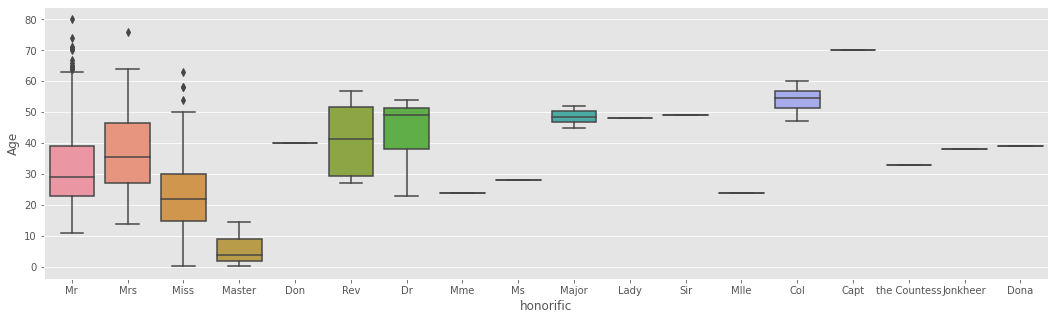

In [42]:
plt.figure(figsize=(18,5))
sns.boxplot(x='honorific',y='Age',data=all_df)

In [43]:
all_df[['Age','honorific']].groupby('honorific').mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


#### 호칭별 생존율 차이 확인하기

In [44]:
#원래 데이터프레임에 이름을 만든 데이터프레임 결합
train_df=pd.concat([train_df,name_df[0:len(train_df)].reset_index(drop=True)],axis=1)
test_df=pd.concat([test_df,name_df[len(train_df):].reset_index(drop=True)],axis=1)

<AxesSubplot:xlabel='honorific'>

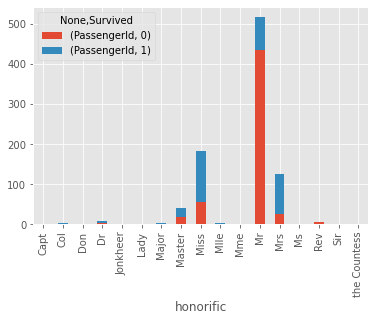

In [45]:
honorific_df=train_df[['honorific','Survived','PassengerId']].dropna().groupby(['honorific','Survived']).count().unstack()
honorific_df.plot.bar(stacked=True)

miss, mrs 생존율 높다<br>
#### 연령의 결측치를 호칭별 평균 연령으로 보완

In [46]:
honorific_age_mean=all_df[['honorific','Age']].groupby('honorific').mean().reset_index()
honorific_age_mean.columns=['honorific','honorific_Age']
all_df=pd.merge(all_df,honorific_age_mean,on='honorific',how='left')
all_df.loc[(all_df['Age'].isnull()),'Age']=all_df['honorific_Age']
all_df=all_df.drop(['honorific_Age'],axis=1)

#### 가족 인원수 추가하기
데이터에 parch(승선 중인 부모나 자녀 수), sibsp(승선 중인 형제나 배우자 수)가 있다. 이 변수들을 더해 family_num(가족 인원 수)를 만들어 보겠다

In [47]:
all_df['family_num']=all_df['Parch']+all_df['SibSp']
all_df['family_num'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

#### 홀로 승선했는지 여부 변수 추가하기
타이타닉의 조난 상황이라면 가족이 함께 행동했을 가능성이 있다. 연관성 파악을 위해 alone(1이면 혼자, 0이면 가족이 있음)변수를 추가해보겠다

In [48]:
all_df.loc[all_df['family_num']==0,'alone']=1
all_df['alone'].fillna(0,inplace=True)

#### 불필요한 변수 삭제
지금까지 분석을 위해 여러 변수를 추가했다. 불필요한 변수들은 삭제한다.<br>
PassengerId: 단순한 승객의 ID<br>
Name: family_name,honorific,name로 분할했다<br>
family_name: 가족 수가 많고 혼자 있는 승객도 많다<br>
Ticket: 생존 규칙성을 찾기 어렵다<br>
Cabin: 결손치가 많다<br>

In [49]:
all_df=all_df.drop(['PassengerId','Name','family_name','name','Ticket','Cabin'],axis=1)

In [50]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


#### 카테고리 변수를 수치로 변환하기
변수 형태가 object인 것을 카테고리 변수로 관리

In [51]:
categories=all_df.columns[all_df.dtypes=='object']
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


#### 호칭 other로 통합하기
Mr, Miss, Mrs, Master 외에는 수가 적다. 학습을 위해 이외의 호칭은 other로 통합한다.

In [52]:
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.000000,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.000000,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.000000,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.000000,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.000000,0,0,8.0500,S,Mr,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,32.252151,0,0,8.0500,S,Mr,0,1.0
1305,NaN,1,female,39.000000,0,0,108.9000,C,Dona,0,1.0
1306,NaN,3,male,38.500000,0,0,7.2500,S,Mr,0,1.0
1307,NaN,3,male,32.252151,0,0,8.0500,S,Mr,0,1.0


In [53]:
all_df['honorific'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

In [54]:
all_df['honorific'] = np.where(all_df['honorific'].isin(['Mr','Miss','Mrs','Master']), all_df['honorific'], 'Other')
all_df['honorific'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: honorific, dtype: int64

In [55]:
#오류나서 윗절로 대체
'''
all_df.loc[~((all_df['honorific']=='Mr')|(all_df['honorific']=='Miss')|
             (all_df['honorific']=='Mrs')|(all_df['honorific']=='Master')),'honorfic']='other'
all_df.honorific.value_counts()
'''

"\nall_df.loc[~((all_df['honorific']=='Mr')|(all_df['honorific']=='Miss')|\n             (all_df['honorific']=='Mrs')|(all_df['honorific']=='Master')),'honorfic']='other'\nall_df.honorific.value_counts()\n"

In [56]:
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.000000,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.000000,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.000000,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.000000,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.000000,0,0,8.0500,S,Mr,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,32.252151,0,0,8.0500,S,Mr,0,1.0
1305,NaN,1,female,39.000000,0,0,108.9000,C,Other,0,1.0
1306,NaN,3,male,38.500000,0,0,7.2500,S,Mr,0,1.0
1307,NaN,3,male,32.252151,0,0,8.0500,S,Mr,0,1.0


#### 문자열을 수치로 변환하기: 라벨 인코딩
각 카테고리명을 임의의 숫자로 대체

#### 머신 러닝용 라이브러리 불러오기

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
all_df['Embarked'].fillna('missing',inplace=True)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [59]:
le=LabelEncoder()
le=le.fit(all_df['Sex'])
all_df['Sex']=le.transform(all_df['Sex'])

In [60]:
for cat in categories:
    le=LabelEncoder()
    print(cat)
    if all_df[cat].dtypes=='object':
        le=le.fit(all_df[cat])
        all_df[cat]=le.transform(all_df[cat])

Sex
Embarked
honorific


In [61]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


#### 모든 데이터를 학습 데이터와 테스트 데이터로 되돌리기
survived==null이면 테스트 데이터, 아니면 학습 데이터

In [62]:
train_X=all_df[~all_df['Survived'].isnull()].drop('Survived',axis=1).reset_index(drop=True)
train_Y=train_df['Survived']
test_X=all_df[all_df['Survived'].isnull()].drop('Survived',axis=1).reset_index(drop=True)

In [63]:
train_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,3,1,22.000000,1,0,7.2500,2,2,1,0.0
1,1,0,38.000000,1,0,71.2833,0,3,1,0.0
2,3,0,26.000000,0,0,7.9250,2,1,0,1.0
3,1,0,35.000000,1,0,53.1000,2,3,1,0.0
4,3,1,35.000000,0,0,8.0500,2,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,4,0,1.0
887,1,0,19.000000,0,0,30.0000,2,1,0,1.0
888,3,0,21.774238,1,2,23.4500,2,1,3,0.0
889,1,1,26.000000,0,0,30.0000,0,2,0,1.0


In [64]:
test_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,3,1,34.500000,0,0,7.8292,1,2,0,1.0
1,3,0,47.000000,1,0,7.0000,2,3,1,0.0
2,2,1,62.000000,0,0,9.6875,1,2,0,1.0
3,3,1,27.000000,0,0,8.6625,2,2,0,1.0
4,3,0,22.000000,1,1,12.2875,2,3,2,0.0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,32.252151,0,0,8.0500,2,2,0,1.0
414,1,0,39.000000,0,0,108.9000,0,4,0,1.0
415,3,1,38.500000,0,0,7.2500,2,2,0,1.0
416,3,1,32.252151,0,0,8.0500,2,2,0,1.0


#### 홀드 아웃, 교차 검증 실습을 위한 라이브러리 불러오기

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#### 학습 데이터의 20프로 검증 데이터로 분할하기

In [66]:
X_train,X_valid,y_train,y_valid=train_test_split(train_X,train_Y,test_size=0.2)

In [67]:
#anaconda shell에서 conda install -c conda-forge lightgbm 설치해야함
import lightgbm as lgb


#### LightGBM용 데이터셋 작성하기

In [68]:
categories=['Embarked','Pclass','Sex','honorific','alone']
lgb_train=lgb.Dataset(X_train,y_train,categorical_feature=categories)
lgb_eval=lgb.Dataset(X_valid,y_valid,categorical_feature=categories,reference=lgb_train)

#### 하이퍼파라미터 작성하기
objective는 목적에 따라 binary, regression, multiclass에서 선택<br>
여기서는 생존 값과 사망 값 두개로 분류

In [69]:
lgbm_params={
    'objective':'binary',
    'random_seed':1234
}

#### LightGBM으로 머신 러닝 모델 학습시키기
학습 횟수, 학습할때 몇번 연속으로 결과가 개선되지 않으면 학습을 중지할지, verbose_eval에는 학습 결과의 표시 빈도

In [70]:
#train_x['gender'] = pd.to_numeric(train_x['gender'])

model_lgb=lgb.train(lgbm_params,
                   lgb_train,
                   valid_sets=lgb_eval,
                   num_boost_round=100,
                   early_stopping_rounds=20,
                   verbose_eval=10)

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Ref

#### 각 변수의 중요도 조사하기
27번째 학습이 최고 점수를 만들었다.

In [71]:
#중요도 표시
model_lgb.feature_importance()

array([ 34,  19, 184,  20,   8, 241,  27,   3,  19,   0])

<AxesSubplot:>

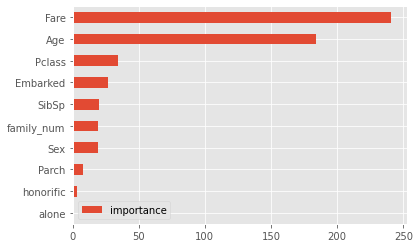

In [72]:
importance=pd.DataFrame(model_lgb.feature_importance(),index=X_train.columns,columns=['importance']).sort_values(by='importance',ascending=True)
importance.plot.barh()

### 검증 데이터로 예측 정확도 확인
#### 모델을 검증 데이터에 적용하기

In [73]:
y_pred=model_lgb.predict(X_valid,num_iteration=model_lgb.best_iteration)

#### 예측 정확도 출력하기

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,np.round(y_pred))

0.8435754189944135

#### 하이퍼파라미터 변경하기

In [75]:
lgbm_params={
    'objective':'binary',
    'max_bin':331,
    'num_leaves':20,
    'min_data_in_leaf':57,
    'random_seed':1234
}

In [76]:
lgb_train=lgb.Dataset(X_train,y_train,categorical_feature=categories)
lgb_eval=lgb.Dataset(X_valid, y_valid,categorical_feature=categories,
                    reference=lgb_train)

In [77]:
model_lgb=lgb.train(lgbm_params,
                   lgb_train,
                   valid_sets=lgb_eval,
                   num_boost_round=100,
                   early_stopping_rounds=20,
                   verbose_eval=10)

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Ref

In [78]:
y_pred=model_lgb.predict(X_valid,num_iteration=model_lgb.best_iteration)

In [79]:
accuracy_score(y_valid,np.round(y_pred))

0.8435754189944135

### 교차 검증을 이용한 학습

In [80]:
#3-fold 교차검증
folds=3
kf=KFold(n_splits=folds)

In [81]:
models=[]
for train_index,val_index in kf.split(train_X):
    X_train=train_X.iloc[train_index]
    X_valid=train_X.iloc[val_index]
    y_train=train_Y.iloc[train_index]
    y_valid=train_Y.iloc[val_index]
    
    lgb_train=lgb.Dataset(X_train,y_train,categorical_feature=categories)
    lgb_eval=lgb.Dataset(X_valid,y_valid,categorical_feature=categories,reference=lgb_train)
    
    model_lgb=lgb.train(lgbm_params,
                   lgb_train,
                   valid_sets=lgb_eval,
                   num_boost_round=100,
                   early_stopping_rounds=20,
                   verbose_eval=10,
                    )
    y_pred=model_lgb.predict(X_valid,num_iteration=model_lgb.best_iteration)
    print(accuracy_score(y_valid,np.round(y_pred)))
    models.append(model_lgb)

C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Ref

[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\whdgu\anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Ref

#### 테스트 데이터의 예측 결과 산출하기
테스트 데이터의 결과를 예측하고 그 값을 저장한다

In [82]:
preds=[]

for model in models:
    pred=model.predict(test_X)
    preds.append(pred)

In [88]:
#예측 결과의 평균
preds_array=np.array(preds)
preds_mean=np.mean(preds_array,axis=0)

In [89]:
#0.5보다 크면 1(생존)로 변환
preds_int=(preds_mean>0.5).astype(int)

#### submission 파일 생성하기

In [85]:
submission['Survived']=preds_int

In [86]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
submission.to_csv('C:/kaggle/titanic_submit01.csv',index=False)